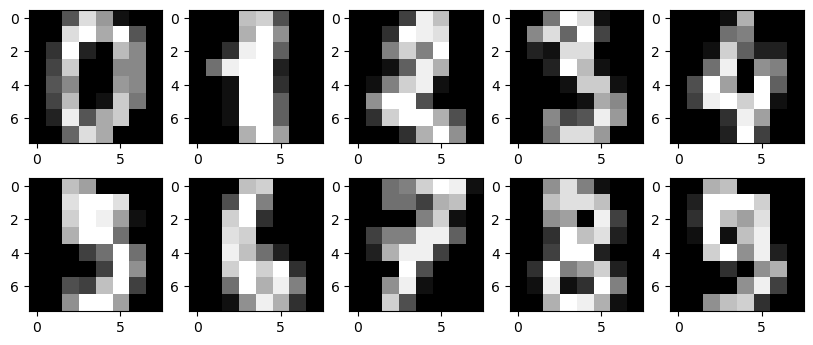

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X, y = digits.data, digits.target

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for lbl in np.unique(y):
    axs[lbl // 5, lbl % 5].imshow(X[y == lbl][0].reshape(8,8), cmap = 'gray')

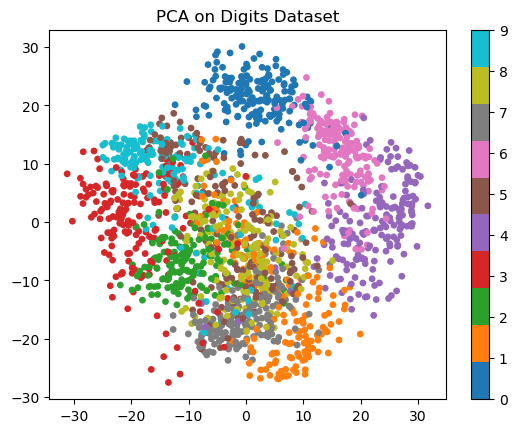

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(X)

plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=y, cmap='tab10', s=15)
plt.title("PCA on Digits Dataset")
plt.colorbar()

### Multidimensional Scaling (MDS)

Suppose we have an abstract dataset of points on some manifold $\{x_i\}_{i=1}^p \in \mathcal{M}$ and some distance $d: \mathcal{M} \times \mathcal{M} \rightarrow \mathbb{R}$. Using this we compute the distance matrix $\mathbf{D} \in \mathbb{R}^{p \times p}$ with entries $d_{ij} = d(x_i, x_j)$. For example $\mathcal{M} = \mathbb{R}^p$ and $d(\mathbf{x}_i, \mathbf{x}_j) = \| \mathbf{x}_i - \mathbf{x}_j \|_2$ actually recovers PCA (see \url{https://mlatcl.github.io/advds/notes/mds.pdf}). We seek to find the set of vectors in the latent space $\{\mathbf{y}_i\}_{i=1}^p \subset \mathbb{R}^k$ where $\| \mathbf{y}_i - \mathbf{y}_j \|_2$ somehow matches $d(x_i, x_j)$. We formalize this in the optimization problem:
$$
    \{\mathbf{z}_i\}_{i=1}^p = \argmin_{ \{\mathbf{w}_i \}_{i=1}^p \subset \mathbb{R}^k} \sum_{i,j}(\|\mathbf{w}_i -\mathbf{w}_j\|_2 - d_{ij})^2.
$$

First, observe that the solutions to this problem are not unique since translations of our data preserve pairwise distances. To address this problem, we will add the constraint that our data are mean centered in $\mathbb{R}^p$ and $\mathbb{R}^k$: $\sum_{i=1}^p \mathbf{x}_i = \bm{0}$ and $\sum_{i=1}^p \mathbf{y}_i = \bm{0}$.

* We use the matrix $\mathbf{J} = \mathbf{I} - \frac{1}{n} \bm{1}\bm{1}^\top$ to mean center the squared distance matrix as $-\frac{1}{2}\mathbf{J} \mathbf{D}^{(2)} \mathbf{J}$ where the entries of the squared distance matrix, $\mathbf{D}^{(2)}$,  are $d_{ij}^2$.
* Then we compute the eigenvalue decomposition: $\mathbf{V}^\top \bm{\Lambda} \mathbf{V} = -\frac{1}{2}\mathbf{J} \mathbf{D}^{(2)} \mathbf{J}$.
* Truncate $\bm{\Lambda}^{1/2}$ and $\mathbf{V}$ to the first $k$ largest eigenvalues and eigenvectors and call these matrices $\overline{\bm{\Lambda}}$ and $\overline{\mathbf{V}}$.
* We define $\mathbf{Z} = \overline{\mathbf{V}} \: \overline{\bm{\Lambda}}^{1/2}$ where $\mathbf{Z}^\top = [\mathbf{z}_1,\dots, \mathbf{z}_n]$.


### Isomap

* Construct graph $G = (V, E)$ where $V = \mathcal{X}$ and $E$ is defined via $k$-NN or $\varepsilon$-ball.
* Let $D^{\text{geo}} \in \mathbb{R}^{n \times n}$ be the matrix of shortest path distances
* Solve classical MDS on $D^{\text{geo}}$

#### Limitations
* "short circuiting" a noisy data point bridges two regions of data that should be far apart
* focuses on modeling large geodesic distances, thus missing smaller ones
* can't visualizing data on two separated submanifolds

/home/nate/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


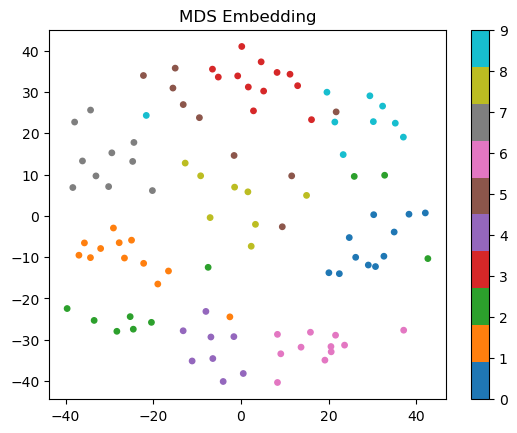

In [11]:
from sklearn.manifold import MDS
my_mds = MDS(n_components=2)
mds_embedding = my_mds.fit_transform(X[:100,:])


plt.scatter(mds_embedding[:, 0], mds_embedding[:, 1], c=y[:100], cmap='tab10', s=15)
plt.title("MDS Embedding")
plt.colorbar()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x70fa88116480>
Traceback (most recent call last):
  File "/home/nate/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nate/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nate/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nate/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

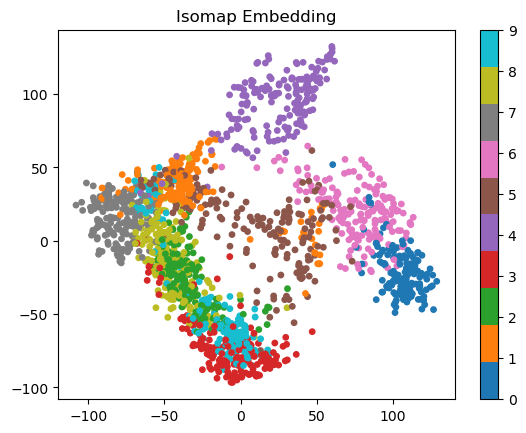

In [13]:
from sklearn.manifold import Isomap
# from sklearn.datasets import make_swiss_roll

# X, color = make_swiss_roll(n_samples=1000)
my_isomap = Isomap(n_neighbors=10, n_components=2)
isomap_embedding = my_isomap.fit_transform(X)

plt.scatter(isomap_embedding[:, 0], isomap_embedding[:, 1], c=y, cmap='tab10', s=15)
plt.title("Isomap Embedding")
plt.colorbar()

